## นายณัฐฤทธิ์ เศวตวรานนท์

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

## เรียกข้อมูล

In [5]:
Cov = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\Python\\2020\\python_dataviz\\2019_nCoV_data.csv')
Cov

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0
...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1,0,0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1,0,0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1,0,0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1,0,1


## ตรวจสอบ Missing / จัดการ missing

In [6]:
Cov.isnull().any()

Sno               False
Date              False
Province/State     True
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [7]:
Cov['Province/State']=Cov['Province/State'].fillna('No')

In [8]:
Cov.isnull().any()

Sno               False
Date              False
Province/State    False
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

### groupby เพื่อทำการจัดกลุ่ม โดยใช้ค่า Max

In [9]:
AB = Cov.groupby(['Date','Country']).max().reset_index()
AB

,Date,Country,Sno,Province/State,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,China,35,Zhejiang,01/22/2020 12:00:00,444,0,0
1,01/22/2020 12:00:00,Japan,36,No,01/22/2020 12:00:00,2,0,0
2,01/22/2020 12:00:00,South Korea,38,No,01/22/2020 12:00:00,1,0,0
3,01/22/2020 12:00:00,Thailand,37,No,01/22/2020 12:00:00,2,0,0
4,01/22/2020 12:00:00,US,32,Washington,01/22/2020 12:00:00,1,0,0
...,...,...,...,...,...,...,...,...
650,2/9/2020 23:20,Thailand,1088,No,8/2/2020 12:53,32,0,10
651,2/9/2020 23:20,UK,1106,No,7/2/2020 18:33,3,0,0
652,2/9/2020 23:20,US,1127,"Tempe, AZ",9/2/2020 7:03,2,0,2
653,2/9/2020 23:20,United Arab Emirates,1098,No,8/2/2020 7:03,7,0,0


In [10]:
GC = Cov.groupby(['Country']).max().reset_index()
GC

,Country,Sno,Date,Province/State,Last Update,Confirmed,Deaths,Recovered
0,Australia,1696,2/9/2020 23:20,Victoria,9/2/2020 19:33,5,0,4
1,Belgium,1704,2/9/2020 23:20,No,4/2/2020 15:43,1,0,1
2,Brazil,83,01/23/2020 12:00:00,No,01/23/2020 12:00:00,0,0,0
3,Cambodia,1705,2/9/2020 23:20,No,31/1/2020 8:15,1,0,1
4,Canada,1706,2/9/2020 23:20,"Toronto, ON",7/2/2020 5:43,5,0,1
5,China,35,01/22/2020 12:00:00,Zhejiang,01/22/2020 12:00:00,444,0,0
6,Egypt,1707,02/17/2020 22:00:00,No,2020-02-14T23:53:02,1,0,0
7,Finland,1708,2/9/2020 23:20,No,31/1/2020 8:15,1,0,1
8,France,1685,2/9/2020 23:20,No,8/2/2020 9:53,12,1,4
9,Germany,1683,2/9/2020 23:20,No,9/2/2020 6:13,16,0,1


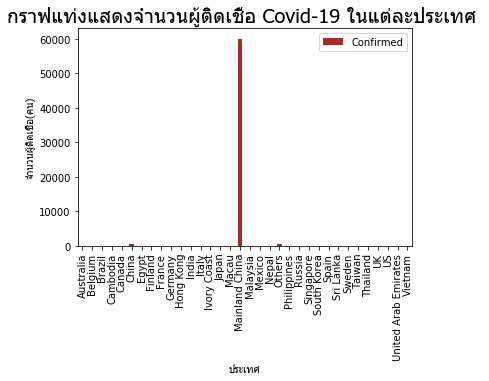

In [11]:
import matplotlib.pyplot as plt 
GC.plot(kind='bar', x='Country', y='Confirmed', color='Brown')
plt.xlabel('ประเทศ',fontname='Tahoma')
plt.ylabel('จำนวนผู้ติดเชื้อ(คน)',fontname='Tahoma')
plt.title('กราฟแท่งแสดงจำนวนผู้ติดเชื้อ Covid-19 ในแต่ละประเทศ ',fontname='Tahoma',fontsize=20)
plt.show()

### ค่าของเมือง Mainland China มีค่าที่แตกต่างกันเกินไปจึงทำการตัดออก

In [12]:
GC1 = GC[GC['Country']!='Mainland China']
GC1

,Country,Sno,Date,Province/State,Last Update,Confirmed,Deaths,Recovered
0,Australia,1696,2/9/2020 23:20,Victoria,9/2/2020 19:33,5,0,4
1,Belgium,1704,2/9/2020 23:20,No,4/2/2020 15:43,1,0,1
2,Brazil,83,01/23/2020 12:00:00,No,01/23/2020 12:00:00,0,0,0
3,Cambodia,1705,2/9/2020 23:20,No,31/1/2020 8:15,1,0,1
4,Canada,1706,2/9/2020 23:20,"Toronto, ON",7/2/2020 5:43,5,0,1
5,China,35,01/22/2020 12:00:00,Zhejiang,01/22/2020 12:00:00,444,0,0
6,Egypt,1707,02/17/2020 22:00:00,No,2020-02-14T23:53:02,1,0,0
7,Finland,1708,2/9/2020 23:20,No,31/1/2020 8:15,1,0,1
8,France,1685,2/9/2020 23:20,No,8/2/2020 9:53,12,1,4
9,Germany,1683,2/9/2020 23:20,No,9/2/2020 6:13,16,0,1


## จำนวนคนที่ติดเชื้อในแต่ละประเทศ

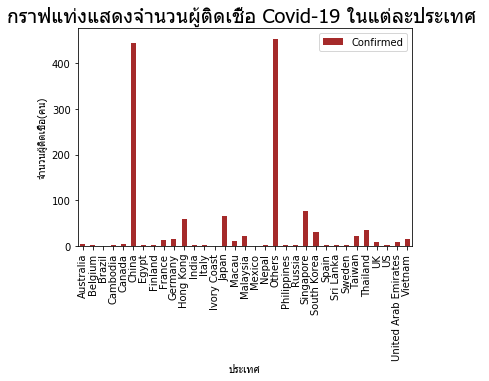

In [13]:
import matplotlib.pyplot as plt 
GC1.plot(kind='bar', x='Country', y='Confirmed', color='Brown')
plt.xlabel('ประเทศ',fontname='Tahoma')
plt.ylabel('จำนวนผู้ติดเชื้อ(คน)',fontname='Tahoma')
plt.title('กราฟแท่งแสดงจำนวนผู้ติดเชื้อ Covid-19 ในแต่ละประเทศ ',fontname='Tahoma',fontsize=20)
plt.show()

## จำนวนที่รักษาหายในแต่ละประเทศ

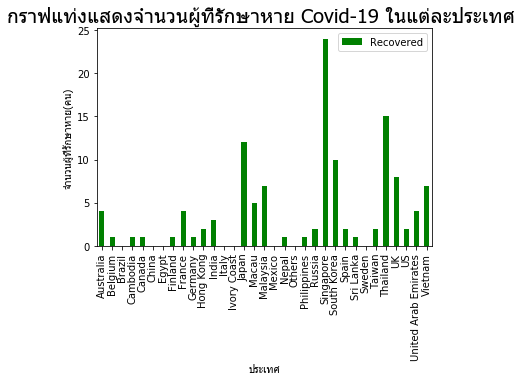

In [14]:
import matplotlib.pyplot as plt 
GC1.plot(kind='bar', x='Country', y='Recovered', color='Green')
plt.xlabel('ประเทศ',fontname='Tahoma')
plt.ylabel('จำนวนผู้ที่รักษาหาย(คน)',fontname='Tahoma')
plt.title('กราฟแท่งแสดงจำนวนผู้ที่รักษาหาย Covid-19 ในแต่ละประเทศ ',fontname='Tahoma',fontsize=20)
plt.show()

Text(0.5, 1.0, 'กราฟแท่งแสดงจำนวนผู้ที่ติดเชื้อ,ตาย,รักษาาหาย Covid-19 ในแต่ละประเทศ ')

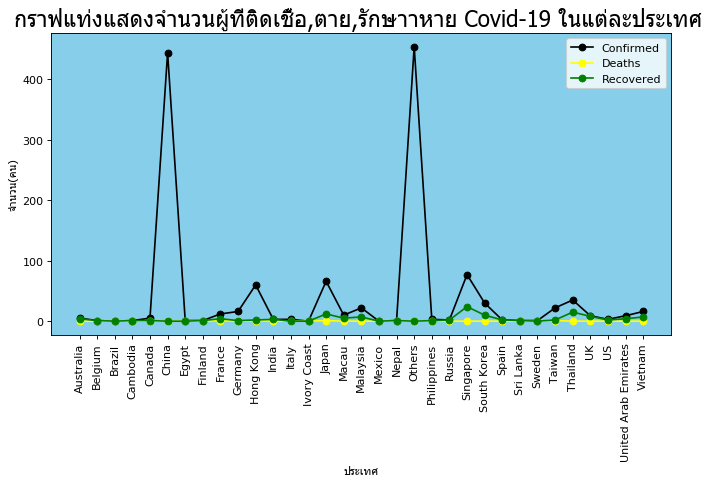

In [69]:
x = GC1.groupby(['Country'], as_index=False).sum()['Country']
y1 = GC1.groupby(['Country'], as_index=False).sum()['Confirmed']
y2 = GC1.groupby(['Country'], as_index=False).sum()['Deaths']
y3 = GC1.groupby(['Country'], as_index=False).sum()['Recovered']
plt.figure(figsize=[10,5],dpi=80)
plt.gca(facecolor='skyblue')
plt.plot(x,y1,'Black',label = "Confirmed",marker='o')
plt.plot(x,y2,'Yellow',label = "Deaths",marker='o')
plt.plot(x,y3,'green',label = "Recovered",marker='o')
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel('ประเทศ',fontname='Tahoma')
plt.ylabel('จำนวน(คน)',fontname='Tahoma')
plt.title('กราฟแท่งแสดงจำนวนผู้ที่ติดเชื้อ,ตาย,รักษาาหาย Covid-19 ในแต่ละประเทศ ',fontname='Tahoma',fontsize=20)

### ดูว่าประเทศที่มีคนติดเชื้อมากว่า 40 คน

In [32]:
import squarify

In [33]:
GC1_40 = GC1[GC1['Confirmed'] >= 40]
GC1_40

,Country,Sno,Date,Province/State,Last Update,Confirmed,Deaths,Recovered
5,China,35,01/22/2020 12:00:00,Zhejiang,01/22/2020 12:00:00,444,0,0
10,Hong Kong,1677,2/9/2020 23:20,Hong Kong,2020-02-17T22:53:01,60,1,2
14,Japan,1676,2/9/2020 23:20,No,9/2/2020 6:13,66,1,12
20,Others,1657,2/9/2020 23:20,Diamond Princess cruise ship,9/2/2020 6:13,454,0,0
23,Singapore,1672,2/9/2020 23:20,No,2020-02-17T14:33:04,77,0,24


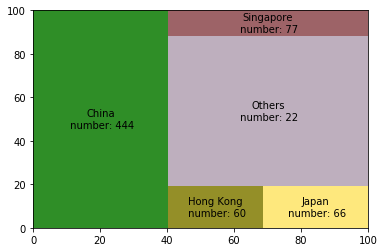

In [35]:
number =GC1_40['Confirmed']
squarify.plot(sizes=number)
labels = ['China\n number: 444',
          'Hong Kong\n number: 60',
            'Japan\n number: 66', 
            'Others\n number: 22',
            'Singapore\n number: 77', 
            'Thailand\n number: 35']
color_list = ['#0f7216', '#b2790c', '#ffe9a3',
                  '#f9d4d4', '#d35158', '#ea3033']
squarify.plot(sizes=number, label=labels,
                  color=color_list, alpha=0.7)

### ตัดเวลาออกในช่อง Date เพื่อจะนำไปใช้งานต่อ

In [51]:
date = []
for i in range(Cov.shape[0]):
    x = Cov.iloc[i]['Date'].split(' ')
    x = x[0].replace('/2020', '')
    date.append(x)

In [53]:
Cov['Date'] = date
Cov

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22,Anhui,China,01/22/2020 12:00:00,1,0,0
1,2,01/22,Beijing,China,01/22/2020 12:00:00,14,0,0
2,3,01/22,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,4,01/22,Fujian,China,01/22/2020 12:00:00,1,0,0
4,5,01/22,Gansu,China,01/22/2020 12:00:00,0,0,0
...,...,...,...,...,...,...,...,...
1714,1715,02/17,"Madison, WI",US,2020-02-05T21:53:02,1,0,0
1715,1716,02/17,"Orange, CA",US,2020-02-01T19:53:03,1,0,0
1716,1717,02/17,"San Antonio, TX",US,2020-02-13T18:53:02,1,0,0
1717,1718,02/17,"Seattle, WA",US,2020-02-09T07:03:04,1,0,1


Text(0.5, 1.0, 'จำนวนคนที่ติดเชื้อ/ตาย/รักษาหาย Covid-19 ')

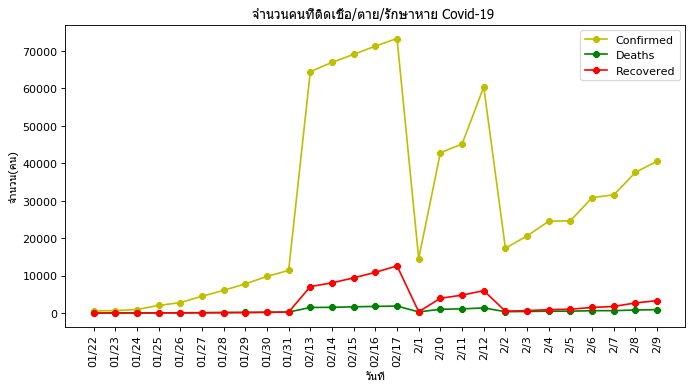

In [67]:
x = Cov.groupby(['Date'], as_index=False).sum()['Date']
y1 = Cov.groupby(['Date'], as_index=False).sum()['Confirmed']
y2 = Cov.groupby(['Date'], as_index=False).sum()['Deaths']
y3 = Cov.groupby(['Date'], as_index=False).sum()['Recovered']
plt.figure(figsize=[10,5],dpi=80)
plt.gca(facecolor='white')
plt.plot(x,y1,'y',label = "Confirmed",marker='8')
plt.plot(x,y2,'g',label = "Deaths",marker='8')
plt.plot(x,y3,'r',label = "Recovered",marker='8')
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel('วันที่',fontname='Tahoma')
plt.ylabel('จำนวน(คน)',fontname='Tahoma')
plt.title('จำนวนคนที่ติดเชื้อ/ตาย/รักษาหาย Covid-19 ',fontname='Tahoma')

## จบ

